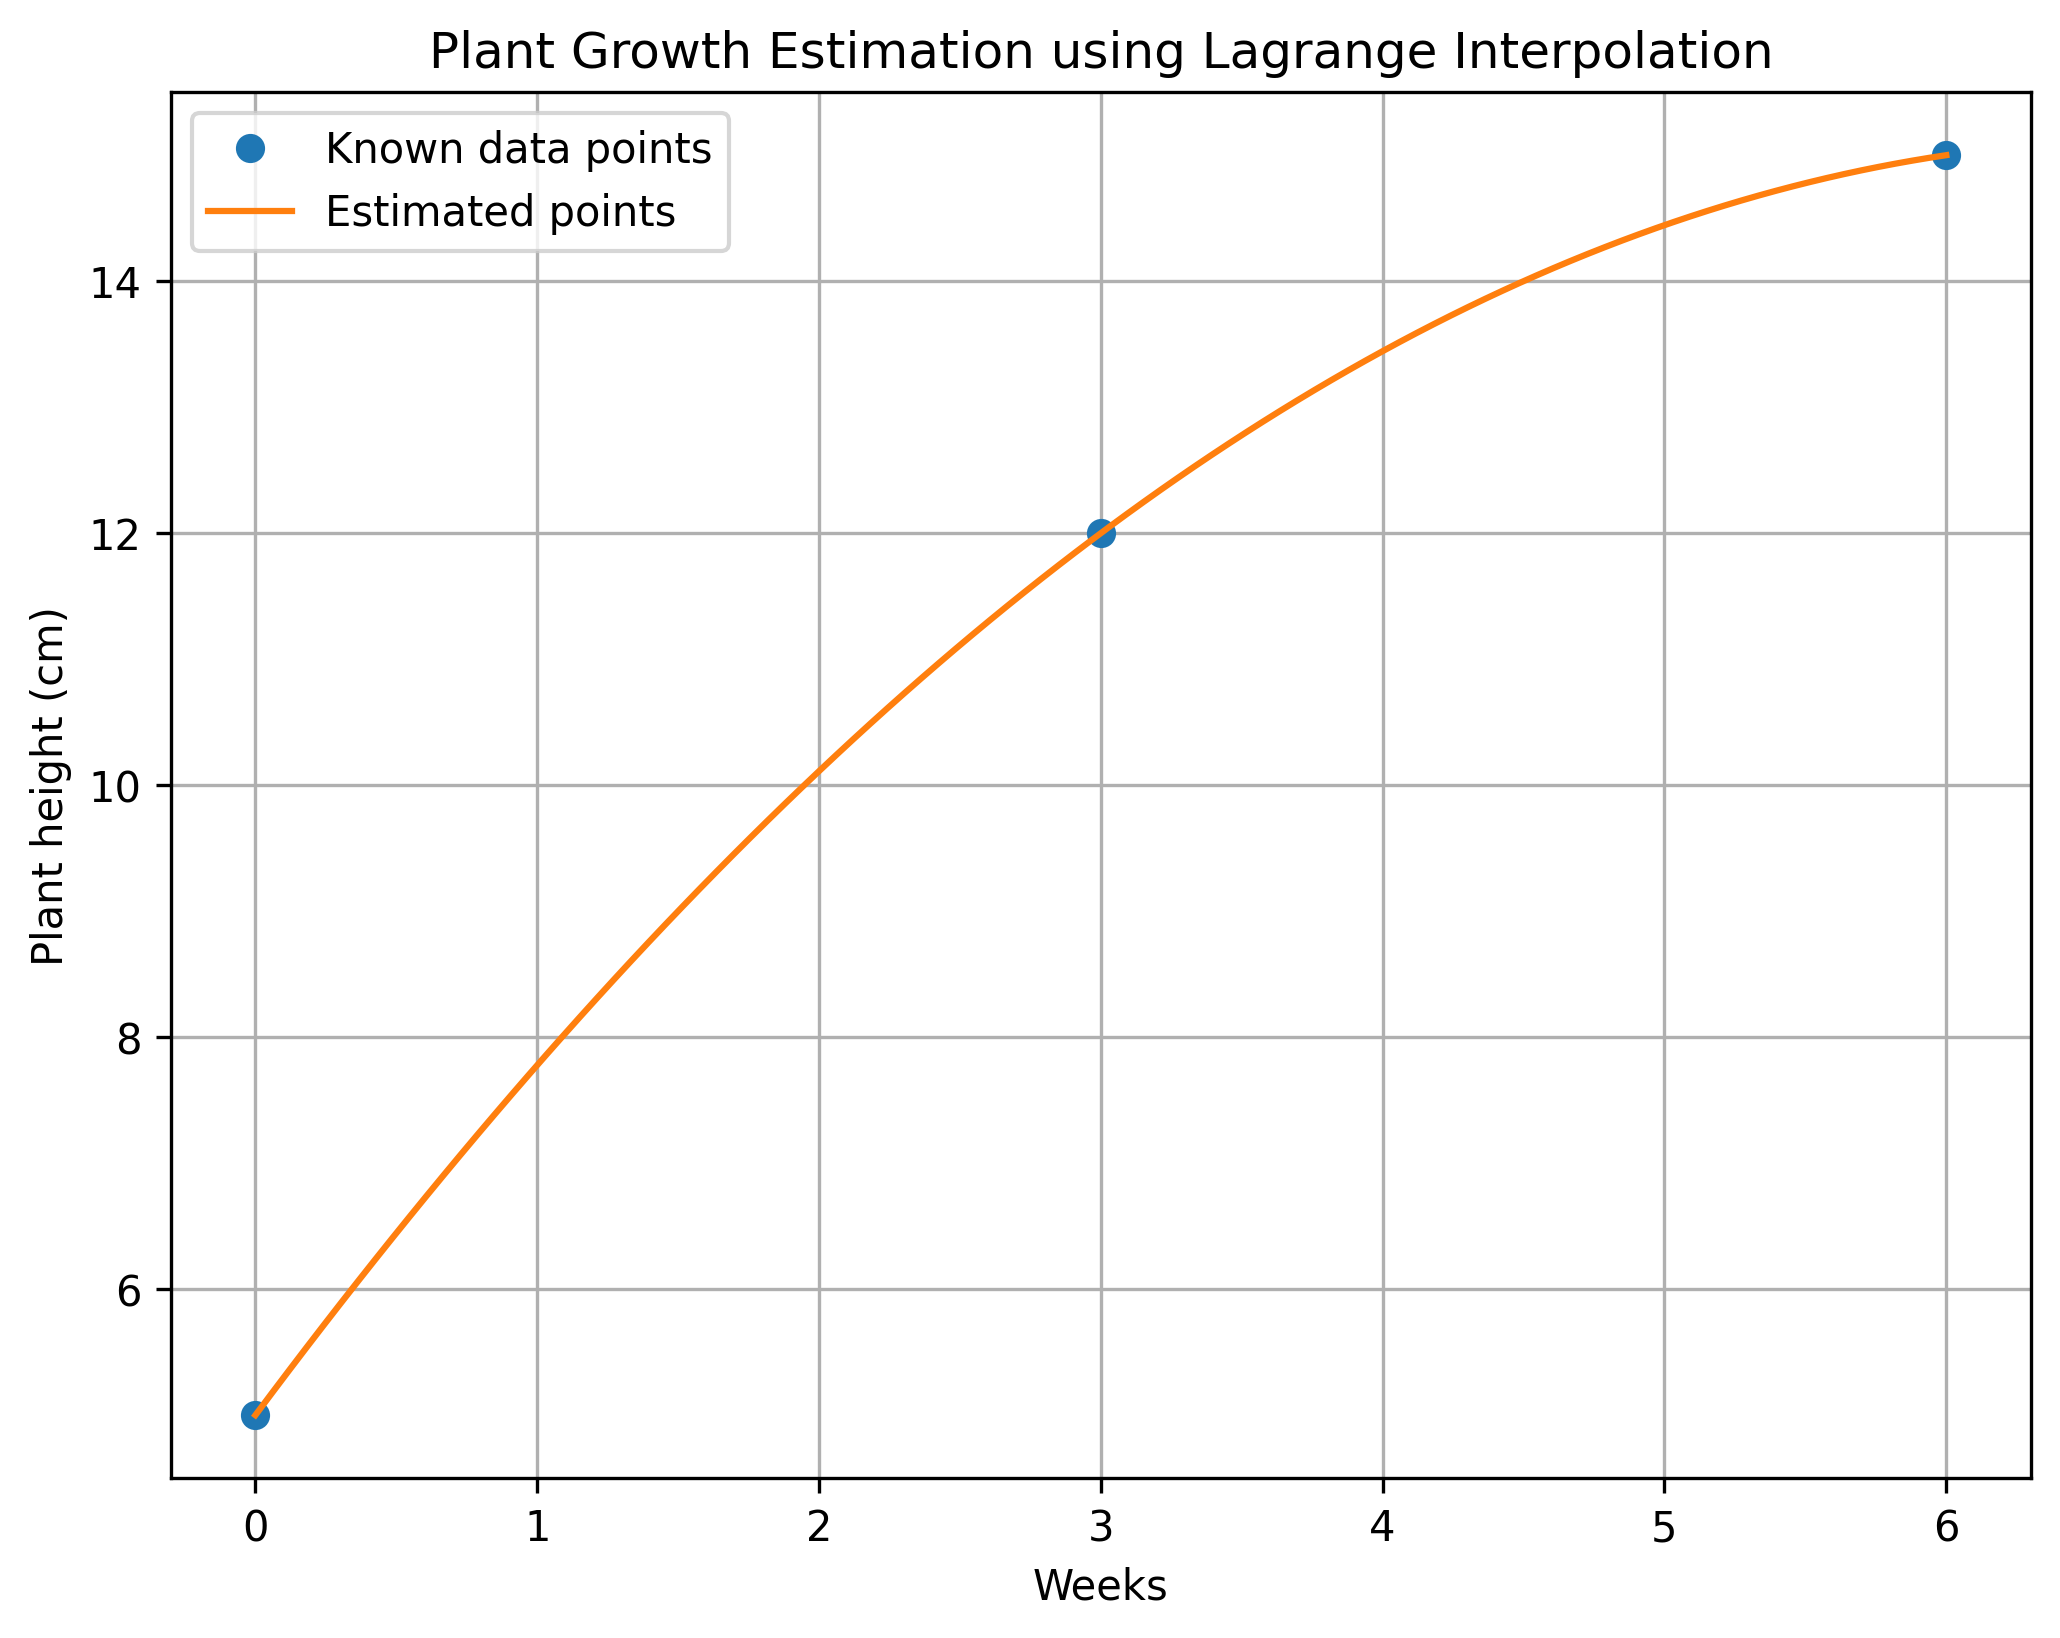

In [2]:
from scipy.interpolate import lagrange
import numpy as np 
import matplotlib.pyplot as plt 


weeks = np.array([0, 3, 6])
heights = np.array([5, 12, 15])

plant_growth_interpolation = lagrange(weeks, heights)

weeks_interpolation = np.linspace(0, 6, 100)
estimated_heights = plant_growth_interpolation(weeks_interpolation)

plt.figure(figsize=(8, 6), dpi=300)
plt.plot(weeks, heights, 'o', label='Known data points')
plt.plot(weeks_interpolation, estimated_heights, '-', label='Estimated points')
plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Plant height (cm)')
plt.title('Plant Growth Estimation using Lagrange Interpolation')
plt.grid(True)
plt.show()

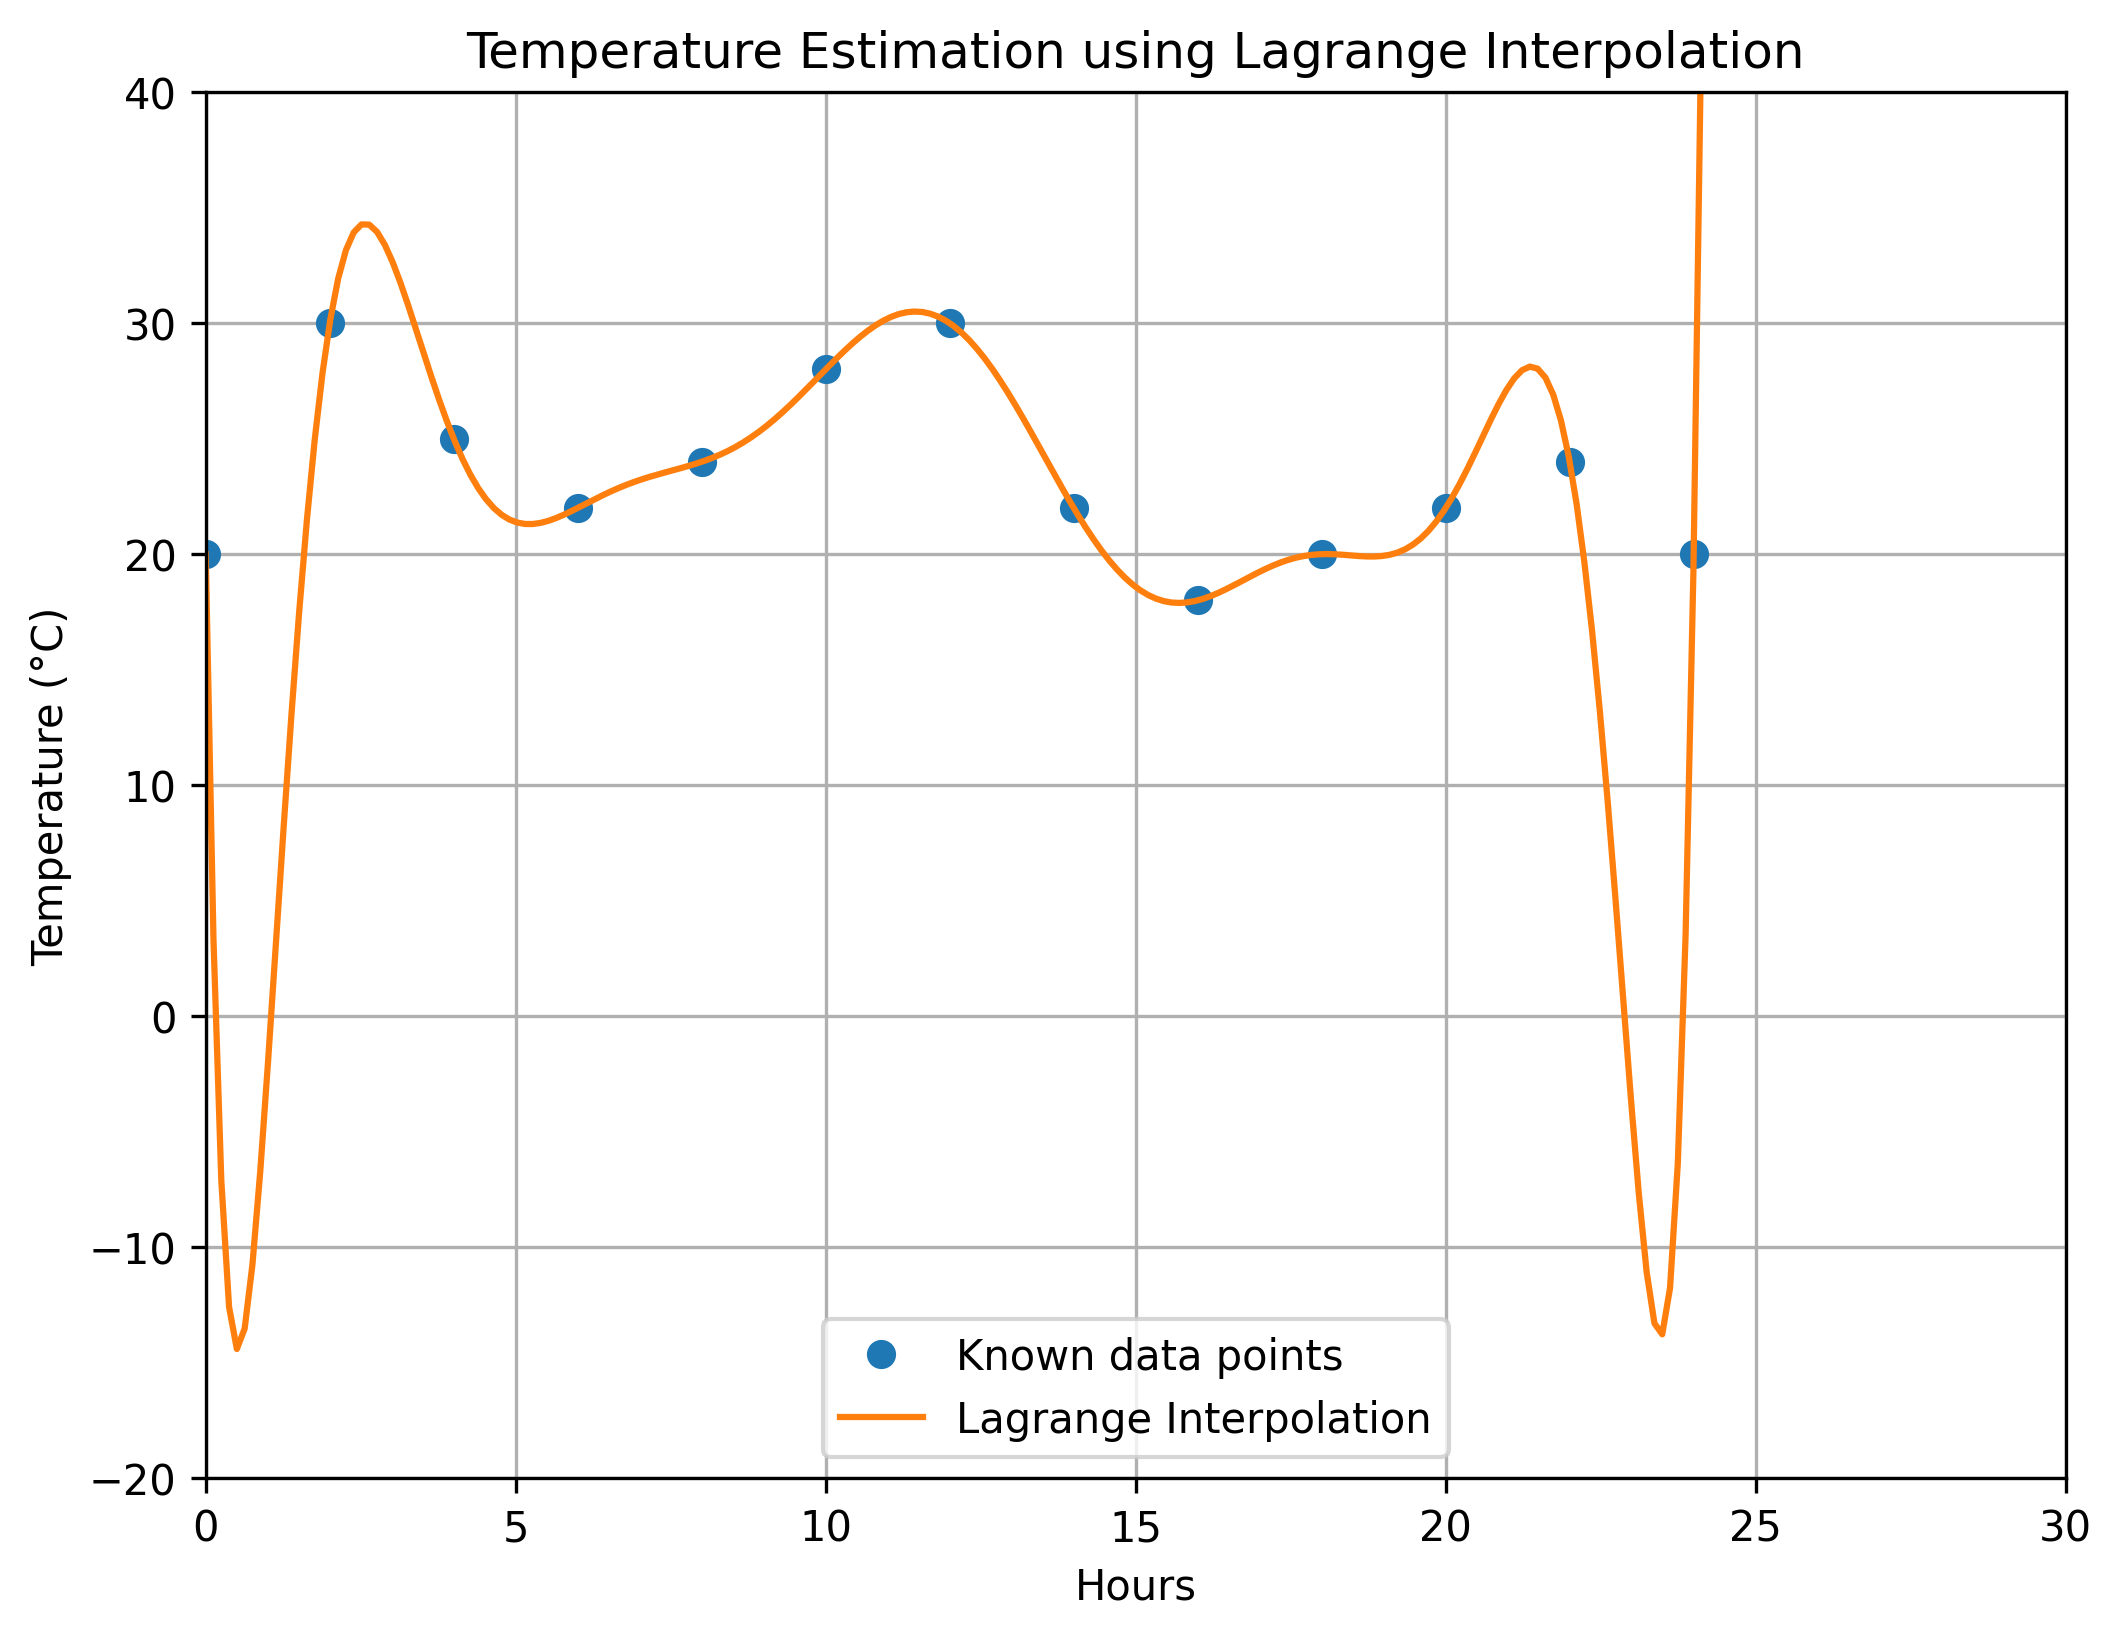

In [3]:
hours = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]) # 시간

temperatures = np.array([20, 30, 25, 22, 24, 28, 30, 22, 18, 20, 22, 24, 20]) # 온도(°C)
# 라그랑주 보간법을 사용하여 보간 함수 생성
temperature_interpolation = lagrange(hours, temperatures)
# 보간 함수를 사용하여 추정된 온도 데이터 생성
hours_interpolation = np.linspace(0,25,200)
estimated_temperatures = temperature_interpolation(hours_interpolation)
# 결과 출력 및 그래프로 시각화
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(hours, temperatures,
'o'
, label='Known data points')
plt.plot(hours_interpolation, estimated_temperatures,
'-'
, label='Lagrange Interpolation')
plt.axis([0,30,-20,40])
plt.xlabel('Hours')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Estimation using Lagrange Interpolation')
plt.legend()
plt.grid(True)
plt.show()

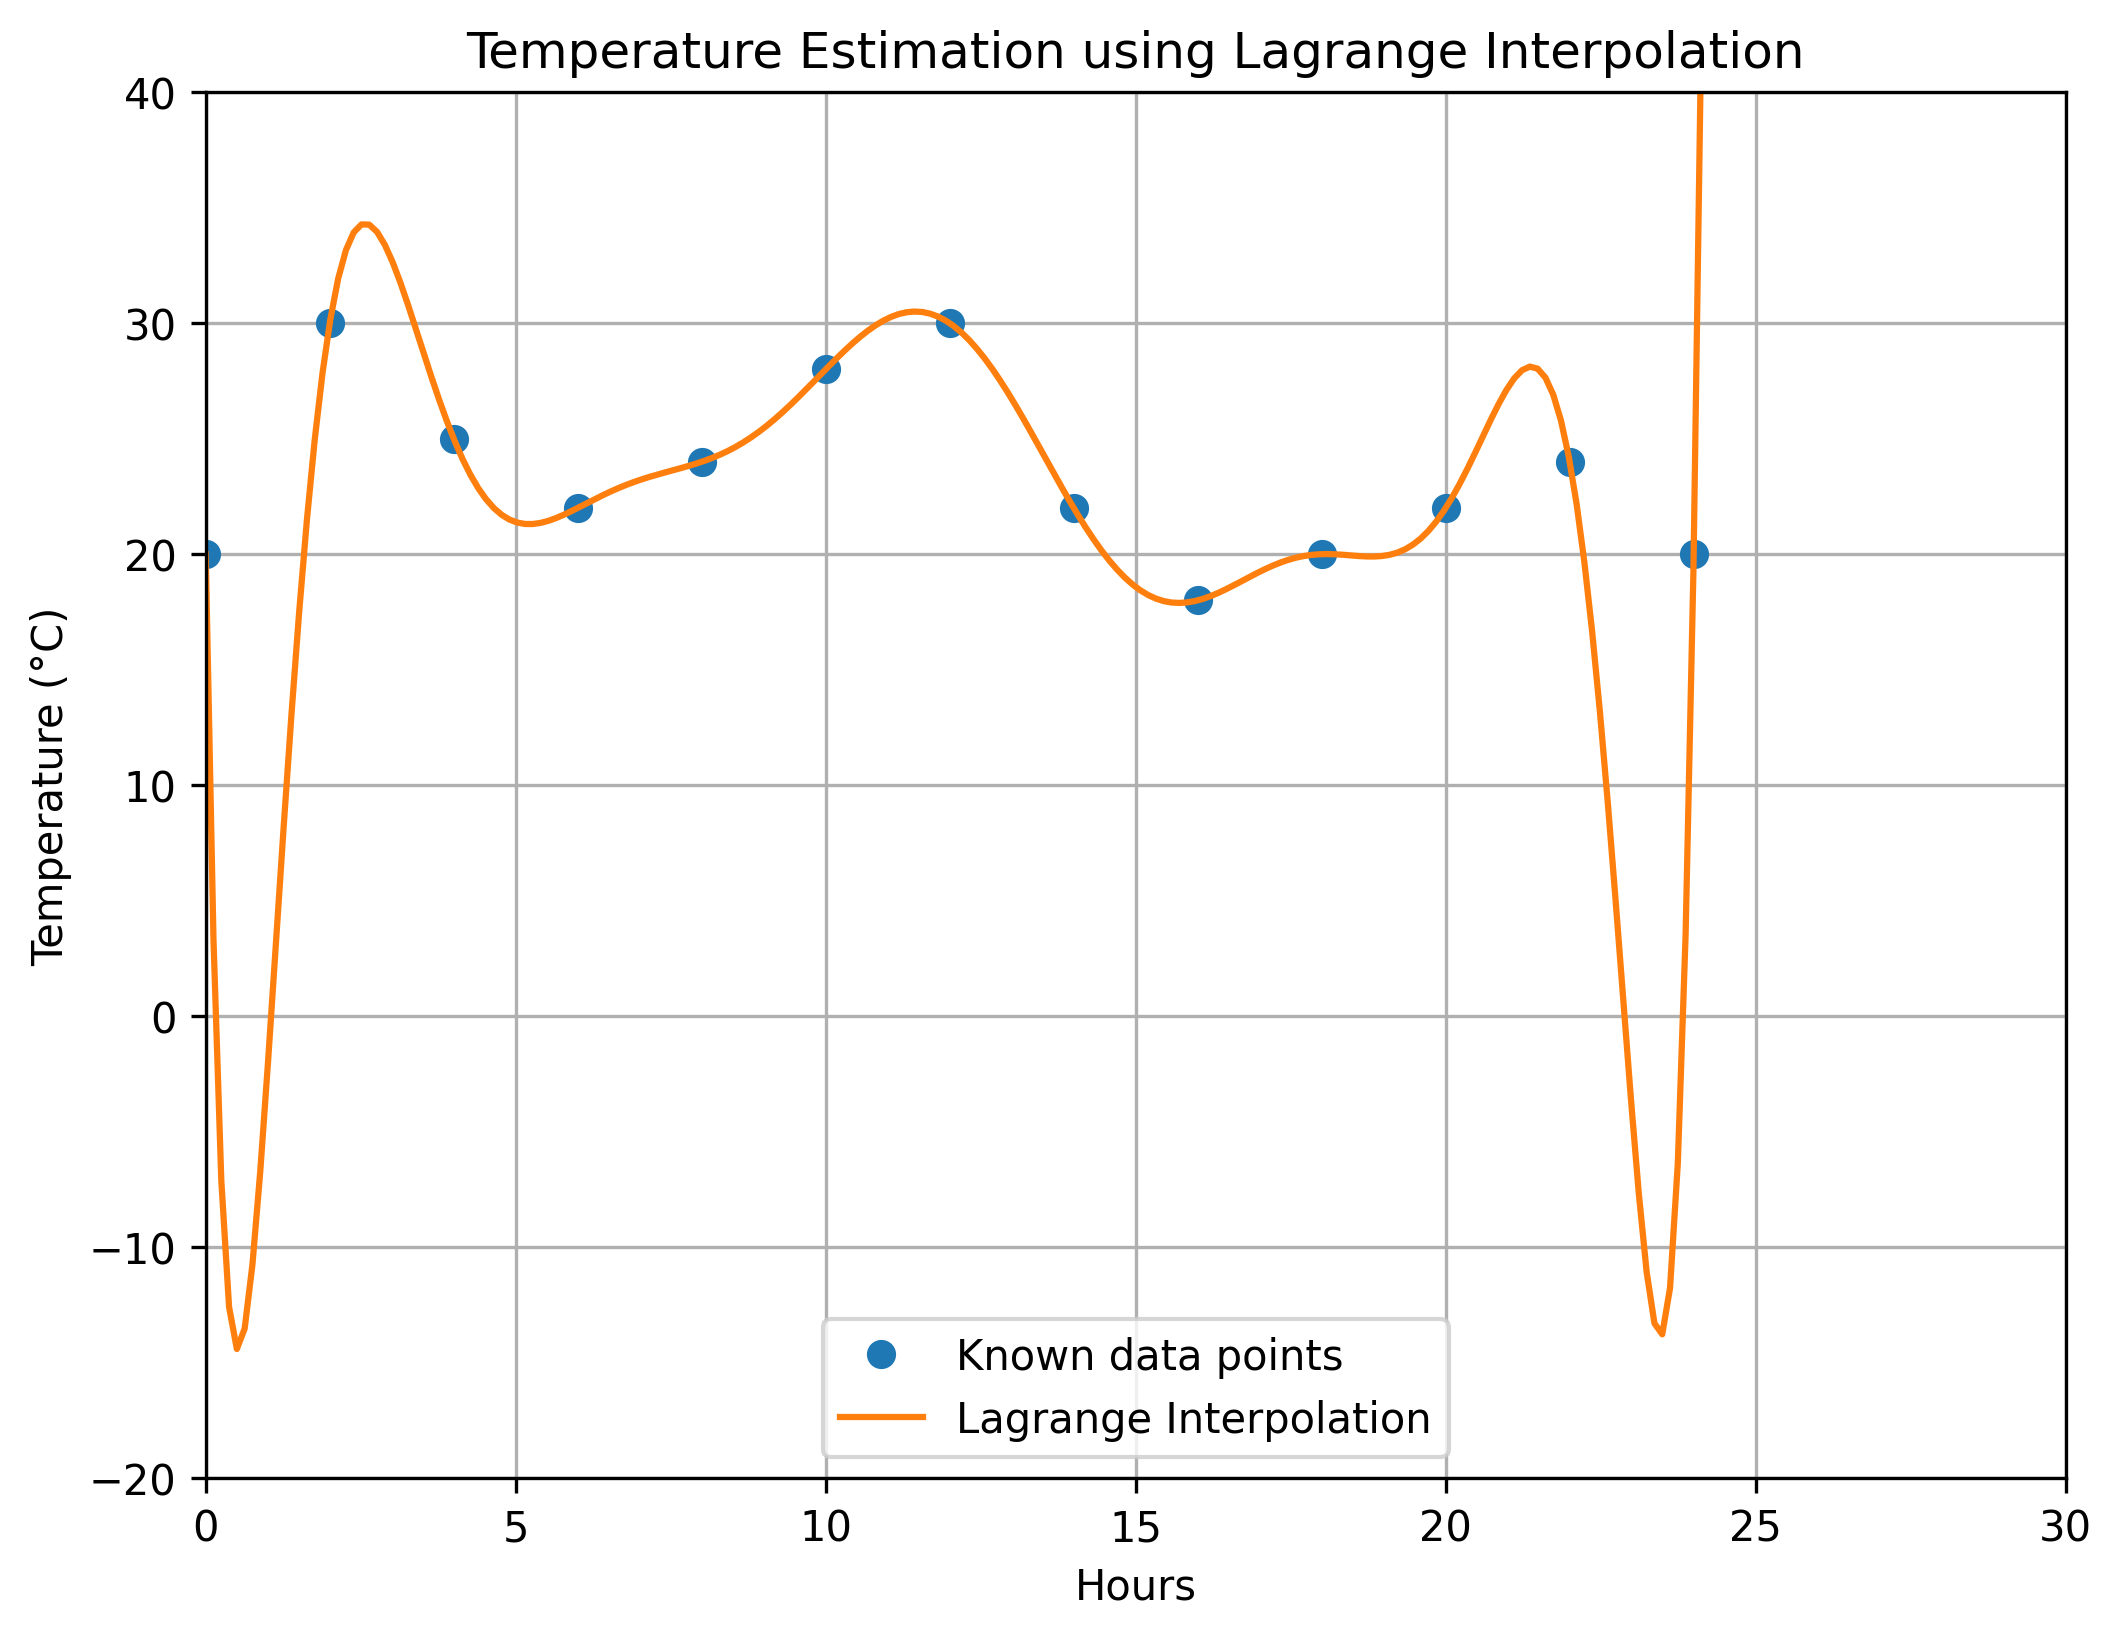

In [4]:
hours = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]) # 시간

temperatures = np.array([20, 30, 25, 22, 24, 28, 30, 22, 18, 20, 22, 24, 20]) # 온도(°C)
# 라그랑주 보간법을 사용하여 보간 함수 생성
temperature_interpolation = lagrange(hours, temperatures)
# 보간 함수를 사용하여 추정된 온도 데이터 생성
hours_interpolation = np.linspace(0,25,200)
estimated_temperatures = temperature_interpolation(hours_interpolation)
# 결과 출력 및 그래프로 시각화
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(hours, temperatures, 'o', label='Known data points')
plt.plot(hours_interpolation, estimated_temperatures, '-', label='Lagrange Interpolation')
plt.axis([0,30,-20,40])
plt.xlabel('Hours')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Estimation using Lagrange Interpolation')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

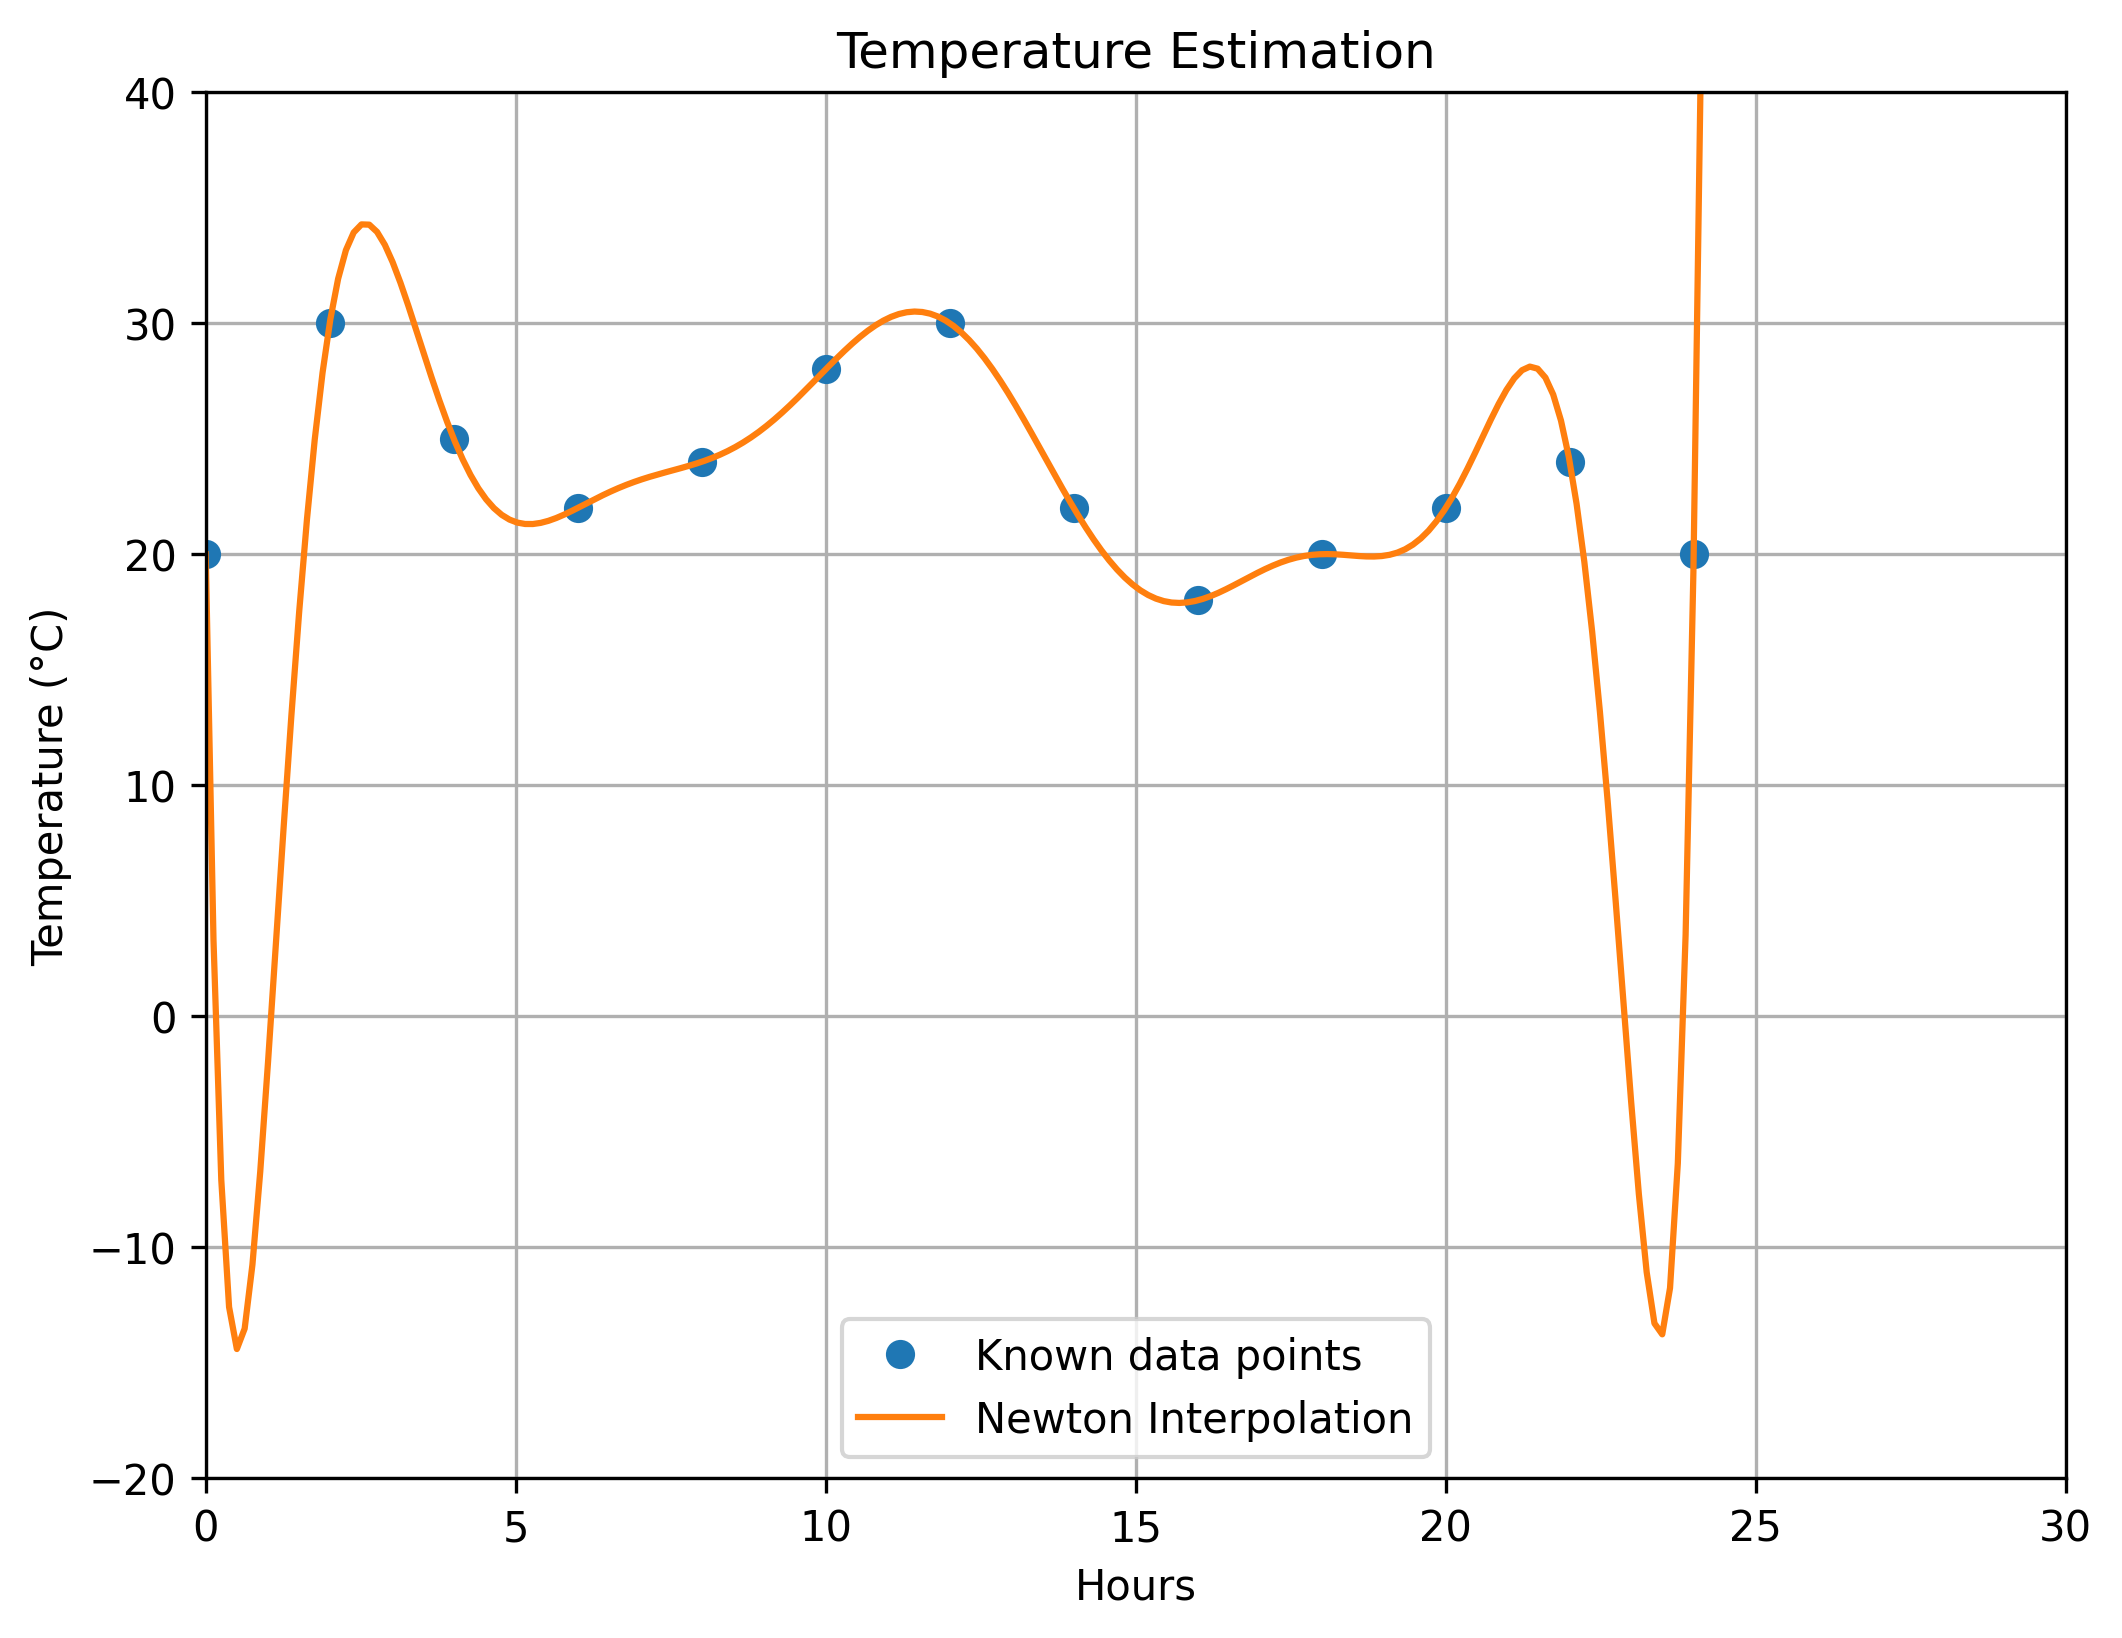

In [10]:
a_s = divided_diff(hours, temperatures)[0, :]

hours_interpolation = np.linspace(0,25,200)
estimated_temperatures = newton_poly(a_s, hours, hours_interpolation)

plt.figure(figsize=(8, 6), dpi=300)
plt.plot(hours, temperatures, 'o', label='Known data points')
plt.plot(hours_interpolation, estimated_temperatures, '-', label='Newton Interpolation')
plt.axis([0,30,-20,40])
plt.xlabel('Hours')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Estimation')
plt.legend()
plt.grid(True)
plt.show()